In [60]:
import xarray as xr
import ecmwflibs
from cfgrib.xarray_store import open_dataset
import numpy as np

In [36]:
grib_file = 'C:\\Projs\\COde\\Earthquake\\earthquake-prediction\\data\\gfs_4_20231017_0000_000.grb2'

# Open the GRIB2 file using xarray
# ds = xr.open_dataset(grib_file, engine='cfgrib', backend_kwargs={'filter_by_keys': {'typeOfLevel': 'atmosphere'}})
open_dataset(grib_file, engine='cfgrib')

DatasetBuildError: multiple values for unique key, try re-open the file with one of:
    filter_by_keys={'typeOfLevel': 'meanSea'}
    filter_by_keys={'typeOfLevel': 'hybrid'}
    filter_by_keys={'typeOfLevel': 'atmosphere'}
    filter_by_keys={'typeOfLevel': 'surface'}
    filter_by_keys={'typeOfLevel': 'planetaryBoundaryLayer'}
    filter_by_keys={'typeOfLevel': 'isobaricInPa'}
    filter_by_keys={'typeOfLevel': 'isobaricInhPa'}
    filter_by_keys={'typeOfLevel': 'heightAboveGround'}
    filter_by_keys={'typeOfLevel': 'depthBelowLandLayer'}
    filter_by_keys={'typeOfLevel': 'heightAboveSea'}
    filter_by_keys={'typeOfLevel': 'atmosphereSingleLayer'}
    filter_by_keys={'typeOfLevel': 'lowCloudLayer'}
    filter_by_keys={'typeOfLevel': 'middleCloudLayer'}
    filter_by_keys={'typeOfLevel': 'highCloudLayer'}
    filter_by_keys={'typeOfLevel': 'cloudCeiling'}
    filter_by_keys={'typeOfLevel': 'heightAboveGroundLayer'}
    filter_by_keys={'typeOfLevel': 'tropopause'}
    filter_by_keys={'typeOfLevel': 'maxWind'}
    filter_by_keys={'typeOfLevel': 'isothermZero'}
    filter_by_keys={'typeOfLevel': 'highestTroposphericFreezing'}
    filter_by_keys={'typeOfLevel': 'pressureFromGroundLayer'}
    filter_by_keys={'typeOfLevel': 'sigmaLayer'}
    filter_by_keys={'typeOfLevel': 'sigma'}
    filter_by_keys={'typeOfLevel': 'potentialVorticity'}

In [18]:
xr.decode_cf(ds)

<xarray.Dataset> Size: 2MB
Dimensions:     (latitude: 361, longitude: 720)
Coordinates:
    time        datetime64[ns] 8B ...
    step        timedelta64[ns] 8B ...
    atmosphere  float64 8B ...
  * latitude    (latitude) float64 3kB 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
  * longitude   (longitude) float64 6kB 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
    valid_time  datetime64[ns] 8B ...
Data variables:
    refc        (latitude, longitude) float32 1MB ...
    tcc         (latitude, longitude) float32 1MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2024-04-14T20:39 GRIB to CDM+CF via cfgrib-0.9.1...

In [19]:
ds.variables

Frozen({'time': <xarray.Variable ()> Size: 8B
[1 values with dtype=datetime64[ns]]
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time, 'step': <xarray.Variable ()> Size: 8B
[1 values with dtype=timedelta64[ns]]
Attributes:
    long_name:      time since forecast_reference_time
    standard_name:  forecast_period, 'atmosphere': <xarray.Variable ()> Size: 8B
[1 values with dtype=float64]
Attributes:
    long_name:  original GRIB coordinate for key: level(atmosphere)
    units:      1, 'latitude': <xarray.IndexVariable 'latitude' (latitude: 361)> Size: 3kB
array([ 90. ,  89.5,  89. , ..., -89. , -89.5, -90. ])
Attributes:
    units:             degrees_north
    standard_name:     latitude
    long_name:         latitude
    stored_direction:  decreasing, 'longitude': <xarray.IndexVariable 'longitude' (longitude: 720)> Size: 6kB
array([  0. ,   0.5,   1. , ..., 358.5, 359. , 359.5])
Attributes:
    units:          degrees_east
    standard

In [23]:
ds['tcc'].values

array([[ 86.1,  86.1,  86.1, ...,  86.1,  86.1,  86.1],
       [ 79.5,  79. ,  78.5, ...,  81.1,  80.5,  80.1],
       [ 97.5,  97.4,  97.1, ...,  97.6,  97.6,  97.5],
       ...,
       [100. , 100. ,  99.9, ..., 100. , 100. , 100. ],
       [ 83.8,  83.1,  82.3, ...,  86.1,  85.3,  84.6],
       [ 76.5,  76.5,  76.5, ...,  76.5,  76.5,  76.5]], dtype=float32)

In [30]:
latt = 23.2599
lonn = 77.4126

bpl_data = ds.sel(latitude=latt, longitude=lonn, method='nearest')

In [32]:
bpl_data.data_vars

Data variables:
    refc     float32 4B ...
    tcc      float32 4B 1.1

In [35]:
reflek = float(bpl_data['refc'].values)
total_cc = float(bpl_data['tcc'].values)
print(reflek, total_cc)


-20.000003814697266 1.100000023841858


In [7]:
# Distance between two poinnts on the earth

# Python 3 program to calculate Distance Between Two Points on Earth
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2):
	
	# The math module contains a function named
	# radians which converts from degrees to radians.
	lon1 = radians(lon1)
	lon2 = radians(lon2)
	lat1 = radians(lat1)
	lat2 = radians(lat2)
	
	# Haversine formula 
	dlon = lon2 - lon1 
	dlat = lat2 - lat1
	a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2

	c = 2 * asin(sqrt(a)) 
	
	# Radius of earth in kilometers. Use 3956 for miles
	r = 6371
	
	# calculate the result
	return(c * r)
	
	
# driver code 
lat1 = 23.2599
lat2 = 22.7196
lon1 = 77.4126
lon2 = 75.8577
print(distance(lat1, lat2, lon1, lon2), "K.M")


170.1243219713033 K.M


---

In [37]:
# Using IMDLIB #

import imdlib as imd

In [51]:
start_yr = 2022
end_yr = 2023
variable = 'rain' # other options are ('tmin'/ 'tmax')
data = imd.get_data(variable, start_yr, end_yr, fn_format='yearwise')

Downloading: rain for year 2022
Downloading: rain for year 2023
Download Successful !!!


In [56]:
start_yr = 2022
end_yr = 2023
variable = 'rain' # other options are ('tmin'/ 'tmax')
file_dir = 'C:/Projs/COde/Earthquake/earthquake-prediction/rain' #Path to save the files
data = imd.open_data(variable, start_yr, end_yr,'yearwise', file_dir)
data

In [57]:
ds = data.get_xarray()
ds

<xarray.Dataset> Size: 102MB
Dimensions:  (time: 730, lat: 129, lon: 135)
Coordinates:
  * lat      (lat) float64 1kB 6.5 6.75 7.0 7.25 7.5 ... 37.75 38.0 38.25 38.5
  * lon      (lon) float64 1kB 66.5 66.75 67.0 67.25 ... 99.25 99.5 99.75 100.0
  * time     (time) datetime64[ns] 6kB 2022-01-01 2022-01-02 ... 2023-12-31
Data variables:
    rain     (time, lat, lon) float64 102MB -999.0 -999.0 ... -999.0 -999.0
Attributes:
    Conventions:  CF-1.7
    title:        IMD gridded data
    source:       https://imdpune.gov.in/
    history:      2024-04-15 08:25:17.480599 Python
    references:   
    comment:      
    crs:          epsg:4326

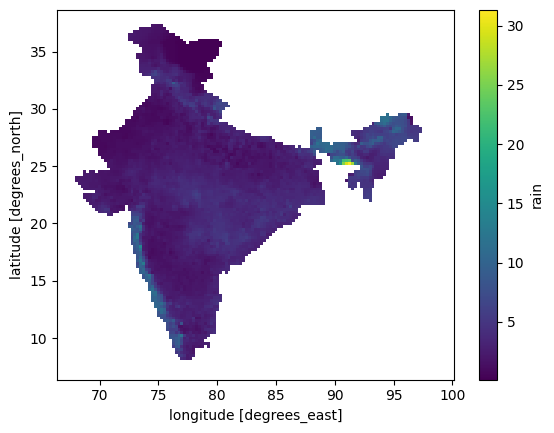

In [58]:
ds = ds.where(ds['rain'] != -999.) #Remove NaN values
ds['rain'].mean('time').plot()

In [76]:
df = ds.to_dataframe()
df

rain
time       lat  lon         
2022-01-01 6.5  66.50    NaN
                66.75    NaN
                67.00    NaN
                67.25    NaN
                67.50    NaN
...                      ...
2023-12-31 38.5 99.00    NaN
                99.25    NaN
                99.50    NaN
                99.75    NaN
                100.00   NaN

[12712950 rows x 1 columns]

In [77]:
df.rain.unique()

array([       nan, 0.        , 5.0996213 , ..., 0.02632885, 0.39881554,
       0.21188194])

In [78]:
df['rain'] = df['rain'].map({np.nan: 0}) 

In [79]:
df

rain
time       lat  lon         
2022-01-01 6.5  66.50    0.0
                66.75    0.0
                67.00    0.0
                67.25    0.0
                67.50    0.0
...                      ...
2023-12-31 38.5 99.00    0.0
                99.25    0.0
                99.50    0.0
                99.75    0.0
                100.00   0.0

[12712950 rows x 1 columns]

In [ ]:
new_df = df.loc['']

In [80]:
df.index

MultiIndex([('2022-01-01',  6.5,  66.5),
            ('2022-01-01',  6.5, 66.75),
            ('2022-01-01',  6.5,  67.0),
            ('2022-01-01',  6.5, 67.25),
            ('2022-01-01',  6.5,  67.5),
            ('2022-01-01',  6.5, 67.75),
            ('2022-01-01',  6.5,  68.0),
            ('2022-01-01',  6.5, 68.25),
            ('2022-01-01',  6.5,  68.5),
            ('2022-01-01',  6.5, 68.75),
            ...
            ('2023-12-31', 38.5, 97.75),
            ('2023-12-31', 38.5,  98.0),
            ('2023-12-31', 38.5, 98.25),
            ('2023-12-31', 38.5,  98.5),
            ('2023-12-31', 38.5, 98.75),
            ('2023-12-31', 38.5,  99.0),
            ('2023-12-31', 38.5, 99.25),
            ('2023-12-31', 38.5,  99.5),
            ('2023-12-31', 38.5, 99.75),
            ('2023-12-31', 38.5, 100.0)],
           names=['time', 'lat', 'lon'], length=12712950)

In [81]:
df = df.reset_index()

In [83]:
df

,time,lat,lon,rain
0,2022-01-01,6.5,66.50,0.0
1,2022-01-01,6.5,66.75,0.0
2,2022-01-01,6.5,67.00,0.0
3,2022-01-01,6.5,67.25,0.0
4,2022-01-01,6.5,67.50,0.0
...,...,...,...,...
12712945,2023-12-31,38.5,99.00,0.0
12712946,2023-12-31,38.5,99.25,0.0
12712947,2023-12-31,38.5,99.50,0.0
12712948,2023-12-31,38.5,99.75,0.0


In [86]:
new_df = [df.loc['lat'] == 22.77]

KeyError: 'lat'